In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read all data
value_iteration_df = pd.read_csv('ValueIterationUtilityChanges.csv')
value_iteration_df.tail(2)

,"(0, 0)","(1, 0)","(2, 0)","(3, 0)","(4, 0)","(5, 0)","(0, 1)","(1, 1)","(2, 1)","(3, 1)",...,"(2, 4)","(3, 4)","(4, 4)","(5, 4)","(0, 5)","(1, 5)","(2, 5)","(3, 5)","(4, 5)","(5, 5)"
687,99.899682,0.0,94.948632,93.779169,92.559740,93.234578,98.294188,95.784972,94.448173,94.302083,...,0.0,0.0,89.456976,90.476192,92.842578,91.634830,90.442144,89.264331,88.478599,89.208031
688,99.900685,0.0,94.949600,93.780127,92.560689,93.235517,98.295179,95.785952,94.449141,94.303040,...,0.0,0.0,89.457890,90.477098,92.843527,91.635769,90.443074,89.265252,88.479504,89.208927


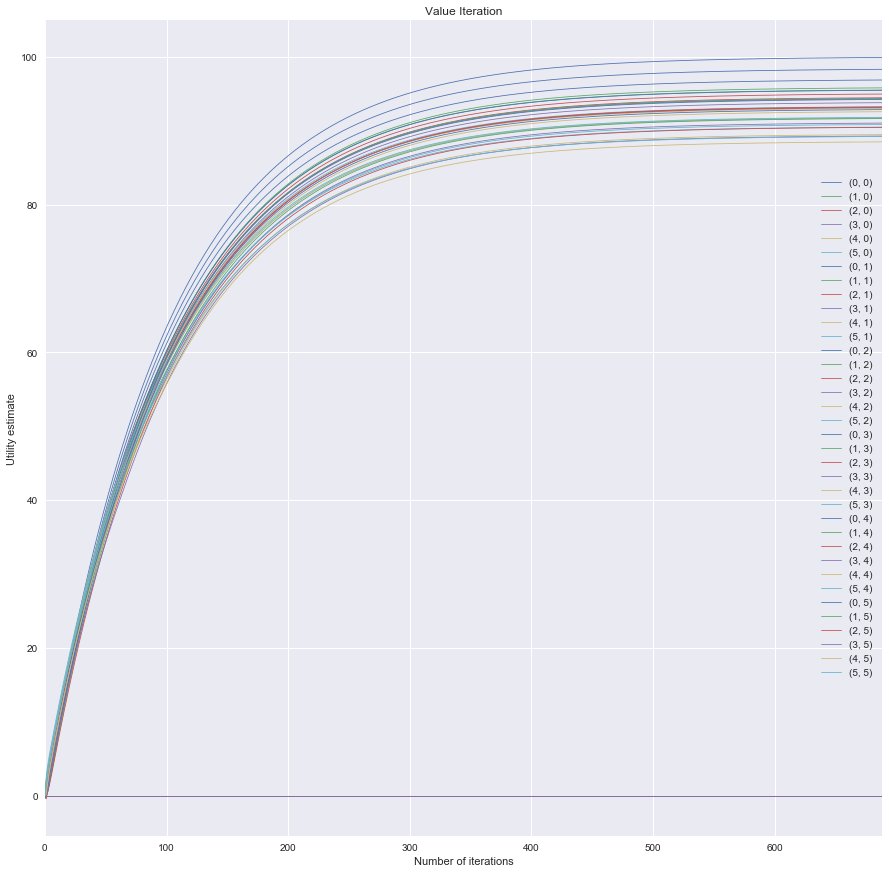

In [3]:
plt.style.use('seaborn')

value_iteration_plot = value_iteration_df.plot(linewidth=0.8, figsize=(15,15), title="Value Iteration")
value_iteration_plot.set(xlabel="Number of iterations", ylabel="Utility estimate")

plt.savefig('Value_Iteration_Utility.png')

In [4]:
policy_iteration_df = pd.read_csv('PolicyIterationUtilityChanges.csv')
policy_iteration_df.tail(2)

,"(0, 0)","(1, 0)","(2, 0)","(3, 0)","(4, 0)","(5, 0)","(0, 1)","(1, 1)","(2, 1)","(3, 1)",...,"(2, 4)","(3, 4)","(4, 4)","(5, 4)","(0, 5)","(1, 5)","(2, 5)","(3, 5)","(4, 5)","(5, 5)"
6,45.284336,0.0,42.202448,41.562939,40.865219,41.775626,44.301752,42.406595,41.730895,42.098377,...,0.0,0.0,39.387612,40.663624,41.178744,40.487635,39.806421,39.134965,38.852619,39.911803
7,50.516134,0.0,47.272923,46.571576,45.462515,46.667965,49.473880,47.519900,46.782646,47.016703,...,0.0,0.0,44.200581,45.526970,46.127806,45.387206,44.656997,43.937036,43.678765,44.724509


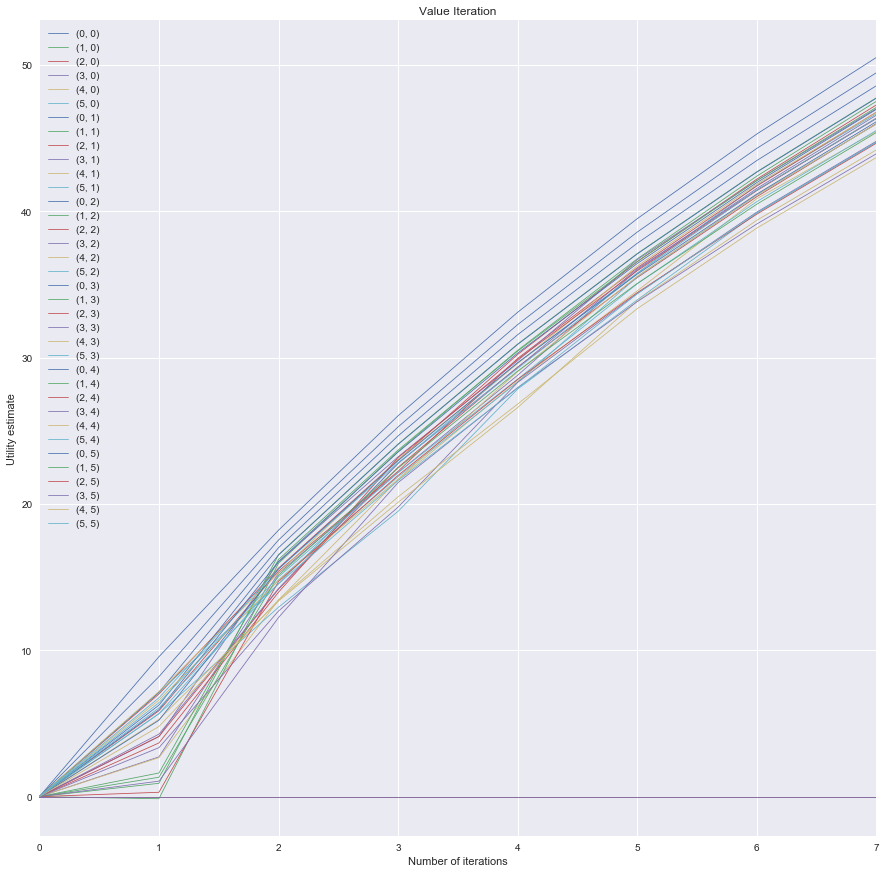

In [5]:
plt.style.use('seaborn')

policy_iteration_plot = policy_iteration_df.plot(linewidth=0.8, figsize=(15,15), title="Value Iteration")
policy_iteration_plot.set(xlabel="Number of iterations", ylabel="Utility estimate")

plt.savefig('Policy_Iteration_Utility.png')

In [6]:
from mpl_toolkits.axes_grid1.axes_grid import ImageGrid

def plot_policy(fig, title, subplot_location, value_list, font_size):
    ha_list = [0, 1, 2, 3, 4, 5]
    va_list = [0, 1, 2, 3, 4, 5]
    wall_list = [[1,0],[4,1],[1,4],[2,4],[3,4]]
    brown_list = [[1,1],[5,1],[2,2],[3,3],[4,4]]
    green_list = [[0,0],[2,0],[5,0],[3,1],[4,2],[5,3]]
    grid = ImageGrid(fig, subplot_location, 
                     nrows_ncols=(len(va_list), len(ha_list)),
                     share_all=True, aspect=True,
                     # label_mode='1',
                     cbar_mode=None)

    for ha, ax in zip(ha_list, grid.axes_row[-1]):
        ax.axis["bottom"].label.set_text(ha)

    # create a grid of axes to display text on.
    grid.axes_row[0][1].set_title(title, size="large")

    for va, ax in zip(va_list, grid.axes_column[0]):
        ax.axis["left"].label.set_text(va)

    # use a different horizontal and vertical alignment for the text in each
    # axes.
    i = 0
    for ha in ha_list:
        for va in va_list:
            ax = grid[i]
            for axis in ax.axis.values():
                axis.toggle(ticks=False, ticklabels=False)

            ax.grid(False)
            # add text to the axes. Set the rotation_mode, horizontal
            # alignment (ha) and vertical alignment (va).
            ax.text(0.5, 0.5, value_list[i], fontsize=font_size,
                    #size="large", 
                    bbox=dict(boxstyle="square,pad=0.",
                              ec="none", fc="0.5", alpha=0), 
                    ha="center", va="center")
            if [va, ha] in wall_list:
                ax.set_facecolor("grey")
            elif [va, ha] in green_list:
                ax.set_facecolor("#0cff0c")
            elif [va, ha] in brown_list:
                ax.set_facecolor("#ff9408")
            i += 1
    
def to_direction(s):
    s = s.replace("LEFT", r"<")
    s = s.replace("RIGHT", r">")
    s = s.replace("UP", r"^")
    s = s.replace("DOWN", r"v")
    s = s.replace("NO_ACTION", r"WALL")
    return s

In [7]:
value_iteration_policy_df = pd.read_csv("ValueIterationPolicy.csv")
value_iteration_policy_df.tail(2)

,"(0, 0)","(1, 0)","(2, 0)","(3, 0)","(4, 0)","(5, 0)","(0, 1)","(1, 1)","(2, 1)","(3, 1)",...,"(2, 4)","(3, 4)","(4, 4)","(5, 4)","(0, 5)","(1, 5)","(2, 5)","(3, 5)","(4, 5)","(5, 5)"
0,UP,NO_ACTION,LEFT,LEFT,LEFT,UP,UP,LEFT,LEFT,LEFT,...,NO_ACTION,NO_ACTION,UP,UP,UP,LEFT,LEFT,LEFT,UP,UP


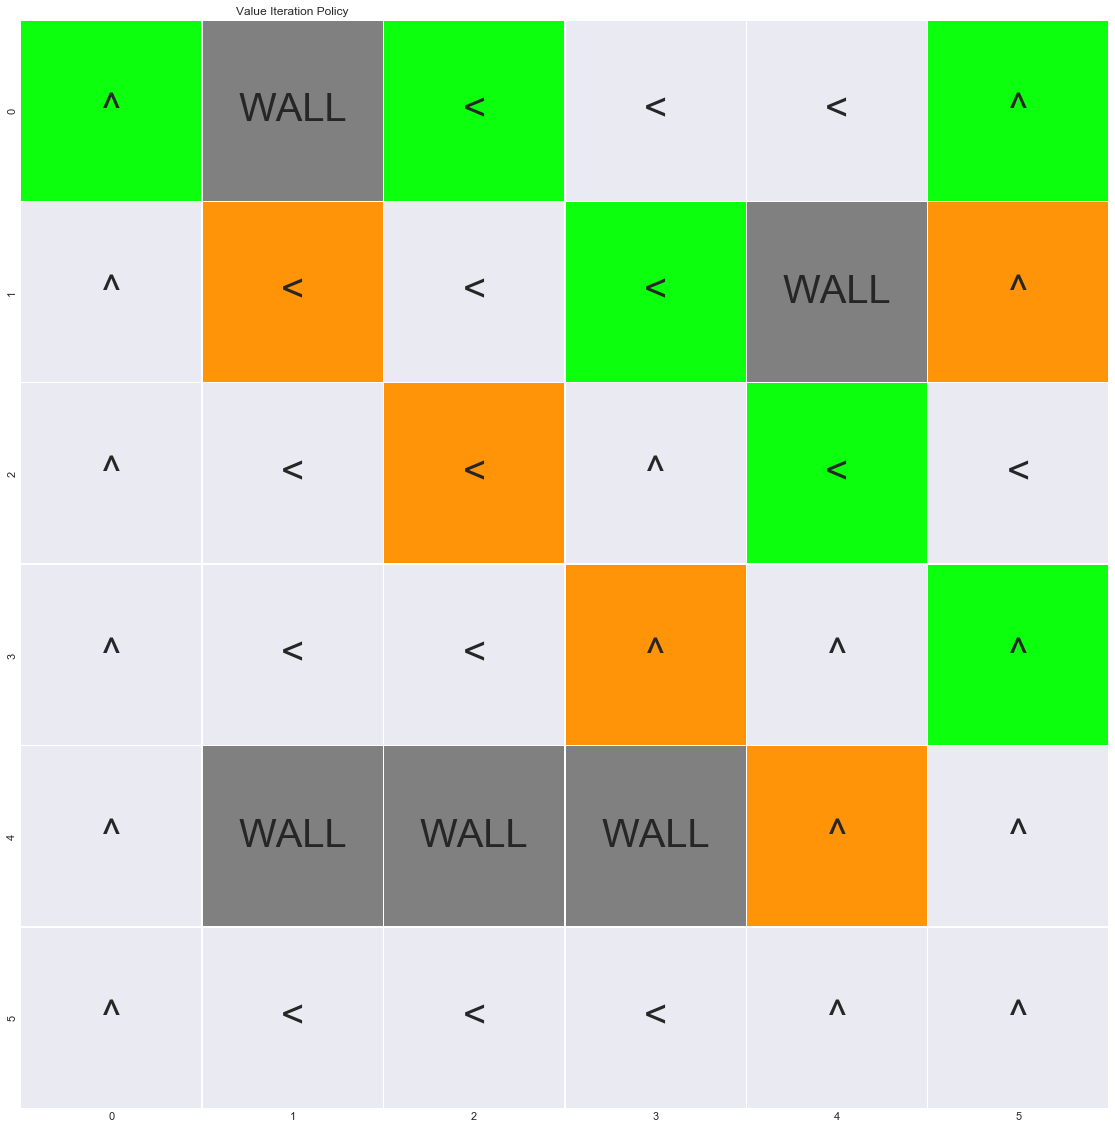

In [8]:
fig = plt.figure(1, figsize=(20, 20))
fig.clf()

value_iteration_policy_list = value_iteration_policy_df.values[0].tolist()
for i in range(len(value_iteration_policy_list)):
    value_iteration_policy_list[i] = to_direction(value_iteration_policy_list[i])

plot_policy(fig, "Value Iteration Policy", 111, value_iteration_policy_list, 40)
plt.show()

fig.savefig('Value_Iteration_Policy.png')

In [9]:
policy_iteration_policy_df = pd.read_csv("PolicyIterationPolicy.csv")
policy_iteration_policy_df.tail(2)

,"(0, 0)","(1, 0)","(2, 0)","(3, 0)","(4, 0)","(5, 0)","(0, 1)","(1, 1)","(2, 1)","(3, 1)",...,"(2, 4)","(3, 4)","(4, 4)","(5, 4)","(0, 5)","(1, 5)","(2, 5)","(3, 5)","(4, 5)","(5, 5)"
0,UP,NO_ACTION,LEFT,LEFT,RIGHT,UP,UP,LEFT,LEFT,RIGHT,...,NO_ACTION,NO_ACTION,UP,UP,UP,LEFT,LEFT,LEFT,RIGHT,UP


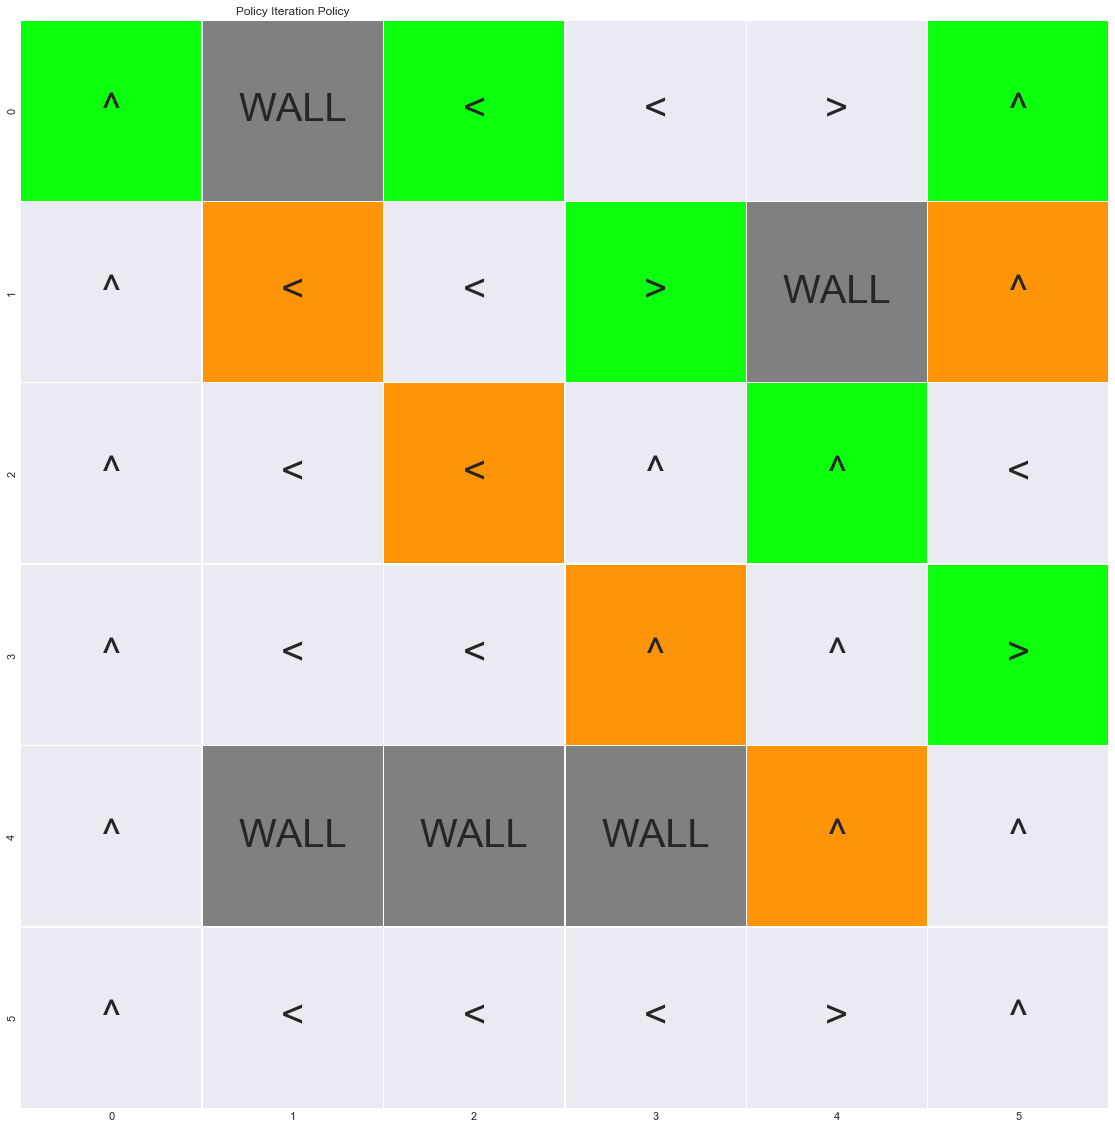

In [10]:
fig = plt.figure(1, figsize=(20, 20))
fig.clf()

policy_iteration_policy_list = policy_iteration_policy_df.values[0].tolist()
for i in range(len(policy_iteration_policy_list)):
    policy_iteration_policy_list[i] = to_direction(policy_iteration_policy_list[i])

plot_policy(fig, "Policy Iteration Policy", 111, policy_iteration_policy_list, 40)
plt.show()

fig.savefig('Policy_Iteration_Policy.png')

In [11]:
value_iteration_df = pd.read_csv('ValueIterationUtilityChanges.csv')
value_iteration_df.tail(2)

,"(0, 0)","(1, 0)","(2, 0)","(3, 0)","(4, 0)","(5, 0)","(0, 1)","(1, 1)","(2, 1)","(3, 1)",...,"(2, 4)","(3, 4)","(4, 4)","(5, 4)","(0, 5)","(1, 5)","(2, 5)","(3, 5)","(4, 5)","(5, 5)"
687,99.899682,0.0,94.948632,93.779169,92.559740,93.234578,98.294188,95.784972,94.448173,94.302083,...,0.0,0.0,89.456976,90.476192,92.842578,91.634830,90.442144,89.264331,88.478599,89.208031
688,99.900685,0.0,94.949600,93.780127,92.560689,93.235517,98.295179,95.785952,94.449141,94.303040,...,0.0,0.0,89.457890,90.477098,92.843527,91.635769,90.443074,89.265252,88.479504,89.208927


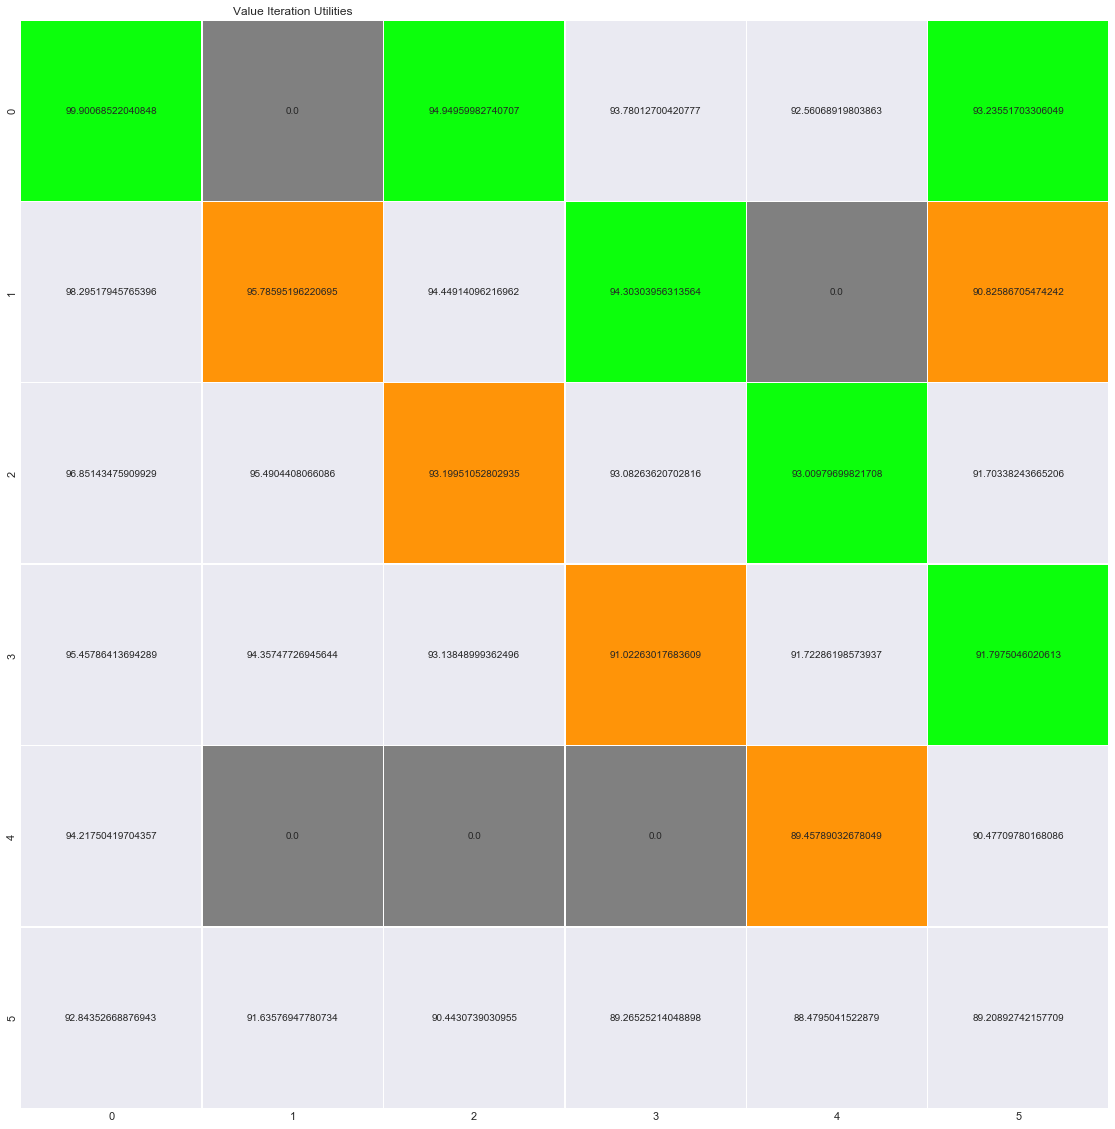

In [12]:
fig = plt.figure(1, figsize=(20, 20))
fig.clf()

value_iteration_list = value_iteration_df[-1:].values[0].tolist()

plot_policy(fig, "Value Iteration Utilities", 111, value_iteration_list, 10)
plt.show()

fig.savefig('Value_Iteration_Utilities.png')

In [13]:
policy_iteration_df = pd.read_csv('PolicyIterationUtilityChanges.csv')
policy_iteration_df.tail(2)

,"(0, 0)","(1, 0)","(2, 0)","(3, 0)","(4, 0)","(5, 0)","(0, 1)","(1, 1)","(2, 1)","(3, 1)",...,"(2, 4)","(3, 4)","(4, 4)","(5, 4)","(0, 5)","(1, 5)","(2, 5)","(3, 5)","(4, 5)","(5, 5)"
6,45.284336,0.0,42.202448,41.562939,40.865219,41.775626,44.301752,42.406595,41.730895,42.098377,...,0.0,0.0,39.387612,40.663624,41.178744,40.487635,39.806421,39.134965,38.852619,39.911803
7,50.516134,0.0,47.272923,46.571576,45.462515,46.667965,49.473880,47.519900,46.782646,47.016703,...,0.0,0.0,44.200581,45.526970,46.127806,45.387206,44.656997,43.937036,43.678765,44.724509


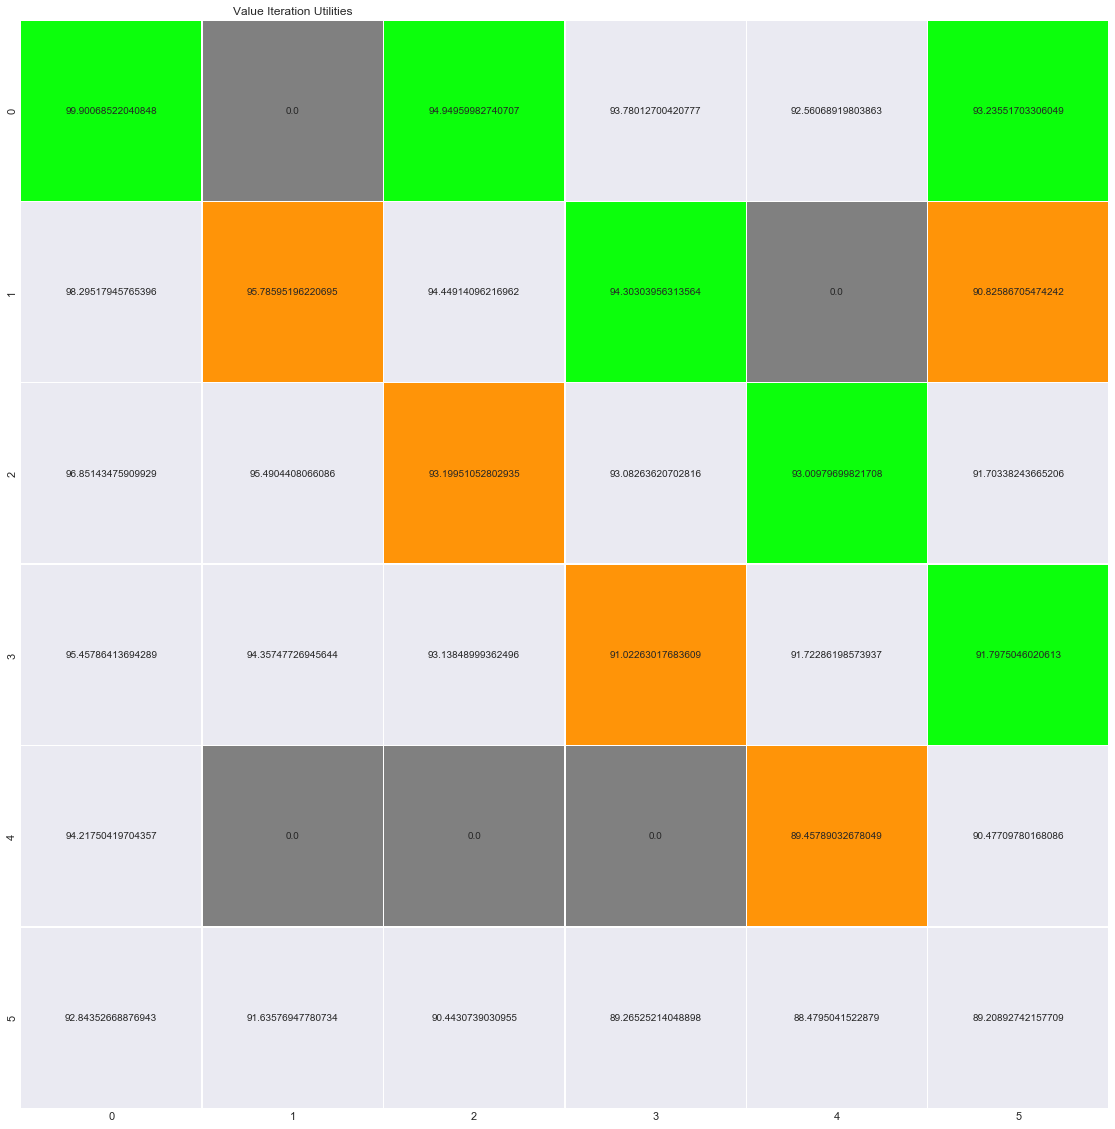

In [14]:
fig = plt.figure(1, figsize=(20, 20))
fig.clf()

policy_iteration_list = value_iteration_df[-1:].values[0].tolist()

plot_policy(fig, "Value Iteration Utilities", 111, value_iteration_list, 10)
plt.show()

fig.savefig('Value_Iteration_Utilities.png')